In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from sauron_colormap import sauron
import math
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset

<ipython-input-1-9746e1ab053d>:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset


In [2]:
plt.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams.update({'font.size': 10})
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = 10;
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2;
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5;
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1;
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in';
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
params = {'mathtext.default': 'regular'}
plt.rcParams.update(params)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [3]:
def mod_black_body(M,T,v,v0,D,b):
    d=D*3.0856e22
    m=M*2e30
    c=3e8
    h=6.626e-34
    kb=1.38e-23
    B=((2*h*v**3/c**2)*1/(np.exp(h*v/(kb*T))))
    k0=0.051
    k=k0*((v/v0)**b)
    S=(k*B*m/(d**2))
    sj=S/1e-26
    return sj

In [4]:
def power_law(a,p,K):
    B=(K*(a/1e10)**p)
    return B

In [5]:
def freefree(SFR,v,Te,dist):
    d=dist*3.086e22
    erg=SFR/(4.6e-28*(Te/1e4)**(-0.45)*(v/1e9)**0.1)
    Lum=erg/1e7
    sj=Lum/(4*math.pi*d**2)
    s=sj/1e-26
    return s

In [6]:
def freefreecom(p,K,M,T,v,v0,D,b,SFR,Te):
    comff=power_law(v,p,K)+mod_black_body(M,T,v,v0,D,b)+freefree(SFR,v,Te,D)
    return comff

In [7]:
def combined(p,K,M,T,v,v0,D,b):
    com=power_law(v,p,K)+mod_black_body(M,T,v,v0,D,b)
    return com

In [8]:
def plotter(p,k,M,T,D,b,nucp,nuck,nucm,LSB,LSBfr,USB,USBfr,SEDfl,SEDfr,x0,y0,h,w,SEDerror,LSBerr,USBerr,model,SEDd,FFp,FFk,FFM,FFT,FFb,SFR,loglkl):
    fig,ax=plt.subplots(figsize=[15,8])
    rfreq=np.logspace(7,12,100)
    dfreq=np.logspace(10,13,100)
    ffreq=np.logspace(7,13,100)
    pl=power_law(rfreq,p,k)
    plmjy=pl/1e-3
    dust=mod_black_body(M,T,dfreq,6e11,D,b)
    dustmjy=dust/1e-3
    com=combined(p,k,M,T,ffreq,6e11,D,b)
    commjy=com/1e-3
    nuc=combined(nucp,nuck,nucm,T,ffreq,6e11,D,b)
    nucmjy=nuc/1e-3
    ffcombined=freefreecom(FFp,FFk,FFM,FFT,ffreq,6e11,D,FFb,SFR,1e4)
    ffcommjy=ffcombined/1e-3
#     S=model.shape
#     for j in range(S[1]):
#         param=model[j]
#         indv=param[0]
#         intv=param[1]
#         mv=param[2]
#         logmv=10**(mv)
#         cv=combined(indv,intv,logmv,T,ffreq,6e11,D,b)
#         cvmjy=cv/1e-3
#         plt.loglog(ffreq,cvmjy,color='grey',alpha=0.1,zorder=1)
    SEDflmjy=SEDfl/1e-3
    SEDerrmjy=SEDerror/1e-3
    LSBmjy=LSB/1e-3
    USBmjy=USB/1e-3
    LSBerrmjy=LSBerr/1e-3
    USBerrmjy=USBerr/1e-3
    #mxvalind=np.argmax(loglkl)
    #lkmodel=model[mxvalind]
    #print(10**(lkmodel[2]))
    clkl=combined(lkmodel[0],lkmodel[1],10**(lkmodel[2]),T,ffreq,6e11,D,b)
    clklmjy=clkl/1e-3
    plt.loglog(dfreq,dustmjy,color='green',zorder=2)
    plt.loglog(rfreq,plmjy,color='red',zorder=3)
    plt.loglog(ffreq,commjy,color='orchid',zorder=4)
    #plt.loglog(ffreq,ffcommjy,color='orange',zorder=5)
    #plt.loglog(ffreq,clklmjy,color='cyan')
    plt.loglog(ffreq,nucmjy,color='blue',zorder=6)
    plt.loglog(LSBfr,LSBmjy,'*',markersize=12,color='orange',zorder=6)
    plt.loglog(USBfr,USBmjy,'*',markersize=12,color='green',zorder=7)
    plt.errorbar(LSBfr,LSBmjy,yerr=LSBerrmjy,fmt='none',ecolor='black')
    plt.errorbar(USBfr,USBmjy,yerr=USBerrmjy,fmt='none',ecolor='black')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux Density (mJy)')
    plt.ylim(5e-5)
    cmap=plt.cm.get_cmap('plasma')
    cmap.set_bad('black')
    plt.scatter(SEDfr,SEDflmjy,c=SEDd,cmap=cmap,plotnonfinite=True,zorder=8)
    plt.errorbar(SEDfr,SEDflmjy,yerr=SEDerrmjy,fmt='none',ecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    #plt.colorbar(label='Year')
    axins=fig.add_axes([x0,y0,h,w])
    almafl=[LSBmjy,USBmjy]
    almafr=[LSBfr,USBfr]
    axins.plot(almafr,almafl,color='black')
    axins.plot(LSBfr,LSBmjy,'*',markersize=12,color='orange')
    axins.plot(USBfr,USBmjy,'*',markersize=12,color='green')
    axins.errorbar(LSBfr,LSBmjy,yerr=LSBerrmjy,fmt='none',ecolor='black')
    axins.errorbar(USBfr,USBmjy,yerr=USBerrmjy,fmt='none',ecolor='black')
    ax.indicate_inset_zoom(axins,edgecolor='black')

In [9]:
def single_point_plotter(p,k,M,T,D,b,nucp,nuck,nucm,mmfr,mmfl,SEDfl,SEDfr,SEDerror,mmrms):
    fig,ax=plt.subplots(figsize=[15,8])
    rfreq=np.logspace(7,12,100)
    dfreq=np.logspace(10,13,100)
    ffreq=np.logspace(7,13,100)
    plt.loglog(SEDfr,SEDfl,'o')
    plt.errorbar(SEDfr,SEDfl,yerr=SEDerror,fmt='none',ecolor='black')
    plt.loglog(mmfr,mmfl,'v',markersize=12,color='orange')
    plt.errorbar(mmfr,mmfl,yerr=mmrms,fmt='none',ecolor='black')
    pl=power_law(rfreq,p,k)
    dust=mod_black_body(M,T,dfreq,6e11,D,b)
    com=combined(p,k,M,T,ffreq,6e11,D,b)
    nuc=combined(nucp,nuck,nucm,T,ffreq,6e11,D,b)
    plt.loglog(dfreq,dust,color='green')
    plt.loglog(rfreq,pl,color='red')
    plt.loglog(ffreq,com,color='orchid')
    plt.loglog(ffreq,nuc,color='blue')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Flux Density (Jy)')
    plt.ylim(5e-7)

In [10]:
data=pd.read_csv('Documents/SED.csv')
plot=pd.read_csv('Documents/Plot.csv')

In [16]:
i=12
j=16
k=33
index=np.array(plot['Index'])
inter=np.array(plot['Intercept'])
mass=np.array(plot['Mass'])
temp=np.array(plot['Temp'])
dist=np.array(plot['Distance'])
beta=np.array(plot['Beta'])
c=3e5
H0=70
z=(dist[i]/c)*H0
nucin=np.array(plot['Nuc Index'])
nucint=np.array(plot['Nuc Intercept'])
nucmass=np.array(plot['Nuc Mass'])
LSBfl=np.array(plot['LSB Flux'])
LSBfr=np.array(plot['LSB Freq'])
LSBfre=(1+z)*LSBfr
LSBerr=np.array(plot['LSB RMS'])
USBfl=np.array(plot['USB Flux'])
USBfr=np.array(plot['USB Freq'])
USBfre=(1+z)*USBfr
USBerr=np.array(plot['USB RMS'])
SEDflux=plot['SED Flux']
SEDfreq=plot['SED Freq']
SEDerr=np.array(plot['SED RMS'])
SEDdate=plot['SED Date']
LL=plot['LL']
SEDy=np.array(data[SEDflux[[i,j,k]]])
SEDx=np.array(data[SEDfreq[[i,j,k]]])
SEDxe=(1+z)*SEDx
SEDrms=np.array(data[SEDerr[[i,j,k]]])
#SEDyr=data[SEDdate[i]]
x0=np.array(plot['x0'])
y0=np.array(plot['y0'])
h=np.array(plot['h'])
w=np.array(plot['w'])
mm=np.array(plot['1mm flux density (Jy)'])
mmfr=np.array(plot['1mm frequency (Hz)'])
mmfre=(1+z)*mmfr
mmrms=np.array(plot['RMS'])
mcmc=plot['MCMC']
#model=pd.read_csv(mcmc[i], header=None)
#logLH=pd.read_csv(LL[i],header=None)
ffind=plot['FF Index']
ffint=plot['FF Intercept']
ffmass=plot['FF Mass']
fftemp=plot['FF Temp']
ffbeta=plot['FF Beta']
sfr=plot['SFR']

In [17]:
#x=plotter(index[i],inter[i],mass[i],temp[i],dist[i],beta[i],nucin[i],nucint[i],nucmass[i],LSBfl[i],LSBfre[i],USBfl[i],USBfre[i],SEDy,SEDxe,x0[i],y0[i],h[i],w[i],SEDrms,LSBerr[i],USBerr[i],model,SEDyr,ffind[i],ffint[i],ffmass[i],fftemp[i],ffbeta[i],sfr[i],logLH)

In [18]:
#single_point_plotter(index[i],inter[i],mass[i],temp[i],dist[i],beta[i],nucin[i],nucint[i],nucmass[i],mmfre[i],mm[i],SEDy,SEDxe,SEDrms,mmrms[i])

In [19]:
def figure(p,k,M,T,D,b,nucp,nuck,nucm,LSB,LSBfr,USB,USBfr,SEDfl,SEDfr,x0,y0,h,w,SEDerror,LSBerr,USBerr):
    fig,axs=plt.subplots(3,1,sharex=True)
    fig.subplots_adjust(hspace=0)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    
    rfreq=np.logspace(7,12,100)
    dfreq=np.logspace(10,13,100)
    ffreq=np.logspace(7,13,100)
    pl=[]
    dust=[]
    com=[]
    nuc=[]
    for i in range(0,3):
        pwr=power_law(rfreq,p[i],k[i])
        dst=mod_black_body(M[i],T[i],dfreq,6e11,D[i],b[i])
        cm=combined(p[i],k[i],M[i],T[i],ffreq,6e11,D[i],b[i])
        nc=combined(nucp[i],nuck[i],nucm[i],T[i],ffreq,6e11,D[i],b[i])
        pl.append(pwr)
        dust.append(dst)
        com.append(cm)
        nuc.append(nc)
    
    plmjy=np.array(pl)/1e-3
    dustmjy=np.array(dust)/1e-3
    commjy=np.array(com)/1e-3
    nucmjy=np.array(nuc)/1e-3
    SEDflmjy=np.array(SEDfl)/1e-3
    SEDerrmjy=np.array(SEDerror)/1e-3
    LSBmjy=np.array(LSB)/1e-3
    USBmjy=np.array(USB)/1e-3
    LSBerrmjy=np.array(LSBerr)/1e-3
    USBerrmjy=np.array(USBerr)/1e-3
    
    axs[0].loglog(dfreq/1e9,dustmjy[0],color='green',label='Modified Black Body',zorder=2)
    axs[0].loglog(rfreq/1e9,plmjy[0],color='red',label='Synchrotron',zorder=3)
    axs[0].loglog(ffreq/1e9,commjy[0],color='orchid',label='Combined',zorder=4)
    #axs[0].loglog(ffreq,nucmjy[0],color='blue',label='Nuclear',zorder=6)
    LSB,=axs[0].loglog(LSBfr[0]/1e9,LSBmjy[0],'*',markersize=12,color='orange',zorder=6)
    USB,=axs[0].loglog(USBfr[0]/1e9,USBmjy[0],'*',markersize=12,color='green',zorder=7)
    axs[0].errorbar(LSBfr[0]/1e9,LSBmjy[0],yerr=LSBerrmjy[0],fmt='none',ecolor='black')
    axs[0].errorbar(USBfr[0]/1e9,USBmjy[0],yerr=USBerrmjy[0],fmt='none',ecolor='black')
    axs[0].set_ylim(5e-5)
    SED,=axs[0].loglog(SEDfr[:,0]/1e9,SEDflmjy[:,0],'o',zorder=8)
    axs[0].errorbar(SEDfr[:,0]/1e9,SEDflmjy[:,0],yerr=SEDerrmjy[:,0],fmt='none',ecolor='black')
    leg1=axs[0].legend(prop={'size':10},frameon=False,loc='lower left')
    leg2=axs[0].legend([USB,LSB,SED],['USB (Nuclear: not fitted)','LSB (Nuclear: not fitted)','Archival data (entire galaxy)'],prop={'size':10},frameon=False,loc='lower right')
    almafl=np.array([LSBmjy[0],USBmjy[0]])
    almafr=np.array([LSBfr[0],USBfr[0]])/1e9
    axins=axs[0].inset_axes([x0[0],y0[0],h[0],w[0]])
    axins.plot(almafr,almafl,color='black')
    axins.plot(LSBfr[0]/1e9,LSBmjy[0],'*',markersize=12,color='orange')
    axins.plot(USBfr[0]/1e9,USBmjy[0],'*',markersize=12,color='green')
    axins.errorbar(LSBfr[0]/1e9,LSBmjy[0],yerr=LSBerrmjy[0],fmt='none',ecolor='black')
    axins.errorbar(USBfr[0]/1e9,USBmjy[0],yerr=USBerrmjy[0],fmt='none',ecolor='black')
    #axins.set_xlabel('GHz')
    #axins.set_ylabel('mJy')
    axs[0].add_artist(leg1)
    axs[0].indicate_inset_zoom(axins,edgecolor='black')
    axs[0].set_ylabel('Flux Density (mJy)')
    
    
    axs[1].loglog(dfreq/1e9,dustmjy[1],color='green',zorder=2)
    axs[1].loglog(rfreq/1e9,plmjy[1],color='red',zorder=3)
    axs[1].loglog(ffreq/1e9,commjy[1],color='orchid',zorder=4)
    #axs[1].loglog(ffreq,nucmjy[1],color='blue',zorder=6)
    axs[1].loglog(LSBfr[1]/1e9,LSBmjy[1],'*',markersize=12,color='orange',zorder=6)
    axs[1].loglog(USBfr[1]/1e9,USBmjy[1],'*',markersize=12,color='green',zorder=7)
    axs[1].errorbar(LSBfr[1]/1e9,LSBmjy[1],yerr=LSBerrmjy[1],fmt='none',ecolor='black')
    axs[1].errorbar(USBfr[1]/1e9,USBmjy[1],yerr=USBerrmjy[1],fmt='none',ecolor='black')
    axs[1].set_ylim(5e-5)
    axs[1].loglog(SEDfr[:,1]/1e9,SEDflmjy[:,1],'o',zorder=8)
    axs[1].errorbar(SEDfr[:,1]/1e9,SEDflmjy[:,1],yerr=SEDerrmjy[:,1],fmt='none',ecolor='black')
    axins1=axs[1].inset_axes([x0[1],y0[1],h[1],w[1]])
    almafl=[LSBmjy[1],USBmjy[1]]
    almafr=np.array([LSBfr[1],USBfr[1]])/1e9
    axins1.plot(almafr,almafl,color='black')
    axins1.plot(LSBfr[1]/1e9,LSBmjy[1],'*',markersize=12,color='orange')
    axins1.plot(USBfr[1]/1e9,USBmjy[1],'*',markersize=12,color='green')
    axins1.errorbar(LSBfr[1]/1e9,LSBmjy[1],yerr=LSBerrmjy[1],fmt='none',ecolor='black')
    axins1.errorbar(USBfr[1]/1e9,USBmjy[1],yerr=USBerrmjy[1],fmt='none',ecolor='black')
    #axins1.set_xlabel('GHz')
    #axins1.set_ylabel('mJy')
    axs[1].indicate_inset_zoom(axins1,edgecolor='black')
    axs[1].set_ylabel('Flux Density (mJy)')
    
    axs[2].loglog(dfreq/1e9,dustmjy[2],color='green',zorder=2)
    axs[2].loglog(rfreq/1e9,plmjy[2],color='red',zorder=3)
    axs[2].loglog(ffreq/1e9,commjy[2],color='orchid',zorder=4)
    #axs[2].loglog(ffreq,nucmjy[2],color='blue',zorder=6)
    axs[2].loglog(LSBfr[2]/1e9,LSBmjy[2],'*',markersize=12,color='orange',zorder=6)
    axs[2].loglog(USBfr[2]/1e9,USBmjy[2],'*',markersize=12,color='green',zorder=7)
    axs[2].errorbar(LSBfr[2]/1e9,LSBmjy[2],yerr=LSBerrmjy[2],fmt='none',ecolor='black')
    axs[2].errorbar(USBfr[2]/1e9,USBmjy[2],yerr=USBerrmjy[2],fmt='none',ecolor='black')
    axs[2].set_ylim(5e-5)
    axs[2].loglog(SEDfr[:,2]/1e9,SEDflmjy[:,2],'o',zorder=8)
    axs[2].errorbar(SEDfr[:,2]/1e9,SEDflmjy[:,2],yerr=SEDerrmjy[:,2],fmt='none',ecolor='black')
    axins2=axs[2].inset_axes([x0[2],y0[2],h[2],w[2]])
    #axins3=axs[2].inset_axes([0.78,0.53,0.05,0.1])
    #axins3.set_xticks([])
    #axins3.set_yticks([])
    almafl=[LSBmjy[2],USBmjy[2]]
    almafr=np.array([LSBfr[2],USBfr[2]])/1e9
    axins2.plot(almafr,almafl,color='black')
    axins2.plot(LSBfr[2]/1e9,LSBmjy[2],'*',markersize=12,color='orange')
    axins2.plot(USBfr[2]/1e9,USBmjy[2],'*',markersize=12,color='green')
    axins2.errorbar(LSBfr[2]/1e9,LSBmjy[2],yerr=LSBerrmjy[2],fmt='none',ecolor='black')
    axins2.errorbar(USBfr[2]/1e9,USBmjy[2],yerr=USBerrmjy[2],fmt='none',ecolor='black')
    #axins2.set_xlabel('GHz')
    #axins2.set_ylabel('mJy')
    axs[2].indicate_inset_zoom(axins2,edgecolor='black')
    axs[2].set_ylabel('Flux Density (mJy)')
    axs[2].set_xlabel('Frequency (GHz)')

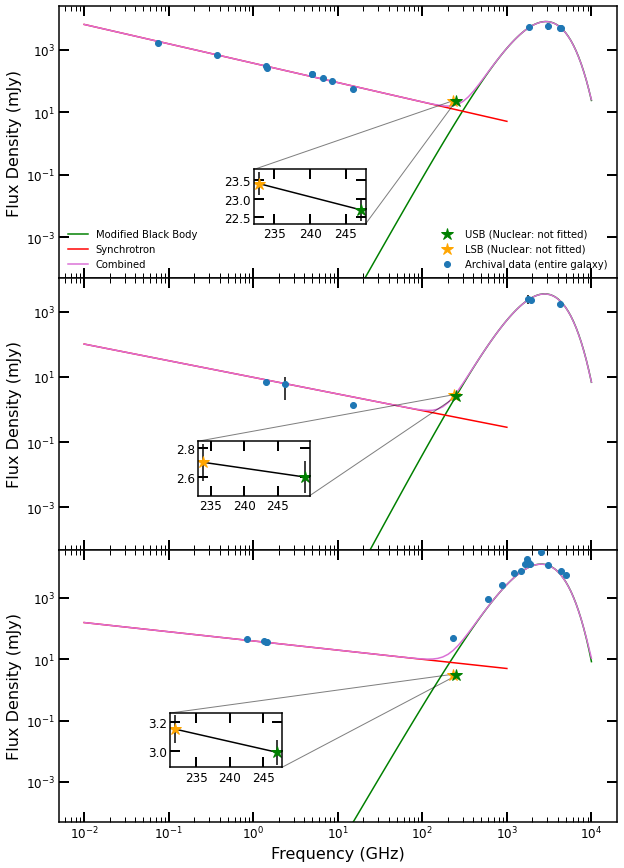

In [20]:
Fig=figure(index[[i,j,k]],inter[[i,j,k]],mass[[i,j,k]],temp[[i,j,k]],dist[[i,j,k]],beta[[i,j,k]],nucin[[i,j,k]],nucint[[i,j,k]],nucmass[[i,j,k]],LSBfl[[i,j,k]],LSBfre[[i,j,k]],USBfl[[i,j,k]],USBfre[[i,j,k]],SEDy,SEDxe,x0[[i,j,k]],y0[[i,j,k]],h[[i,j,k]],w[[i,j,k]],SEDrms,LSBerr[[i,j,k]],USBerr[[i,j,k]])